# <span style="color:Green"><div align="center">Electrical circuits</div></span>

### <span style="color:orange">What is electrical circuit ?

An **electrical circuit** is a path in which electrons from a voltage or current source flow.

The point where those electrons enter an electrical circuit is called the "source" of electrons. The point where the electrons leave an electrical circuit is called the "return" or "earth ground". The exit point is called the "return" because electrons always end up at the source when they complete the path of an electrical circuit.

Electronic circuits usually use direct current sources. The load of an electronic circuit may be as simple as a few resistors, capacitors, and a lamp, all connected together to create the flash in a camera. Or an electronic circuit can be complicated, connecting thousands of resistors, capacitors, and transistors. It may be an integrated circuit such as the microprocessor in a computer.

Resistors and other circuit elements can be connected in series or in parallel.

# <span style="color:Purple">This photo shows all the component of Circuits. 

![Electrical-circuits](http://www.funscience.in/images/StudyZone/Physics/ChemicalEffectsOfCurrent/ElectricalSymbols.png)

## <span style="color:Blue"> Kirchhoff's current law

This law is also called Kirchhoff's first law, Kirchhoff's point rule, or Kirchhoff's junction rule (or nodal rule).

This law states that, for any node (junction) in an electrical circuit, the sum of currents flowing into that node is equal to the sum of currents flowing out of that node; or equivalently:

The algebraic sum of currents in a network of conductors meeting at a point is zero.

## <span style="color:Blue">Kirchhoff's voltage law

This law is also called Kirchhoff's second law, Kirchhoff's loop (or mesh) rule, and Kirchhoff's second rule.

This law states that, the directed sum of the potential differences (voltages) around any closed loop is zero.

![](../ohm.jpg)

## ==>><span style="color:green">First see python code for circuit calculation and analyse the circuit.</span> (Manually)

![currents-cycles](../A1.png) 

### Now Identify this given circuits And assign values in clockwise direction.So, we have...

![currents-cycles](../A2.png) 

### So, we have here...

#### $$V1 = 10 Volt$$
#### $$V2 = 4 Volt$$
#### $$R1 = 4000 # 2k Ohm$$
#### $$R2 = 4000 # 2k Ohm$$
#### $$R3 = 2000 # 1k Ohm$$

### 1. Meshes
#### Mesh 1: V1-R1-R3 Loop
#### Mesh 2: R3-R2-V2 Loop

### 2. Mesh Currents (all clockwise)
#### I1 for Mesh 1
#### I2 for Mesh 2



-

-

### 3. Now we find current-1(I1) and current-2(I2) (manually) 

In [13]:
import numpy as np

V1 = 10
V2 = 4
R1 = 4000 # 2k Ohm
R2 = 4000 # 2k Ohm
R3 = 2000 # 1k Ohm



# Mesh 1
# + V1 - R1·I1 - R3·(I1 - I2) = 0
# -(R1 + R3)·I1 + R3·I2 = - V1
I1_mesh1 = -(R1 + R3)
I2_mesh1 = R3
b_mesh1 = -V1



# Mesh 2

# + R3·(I1 - I2) - R2·I2 - V2 = 0
# + R3·I1 - (R3 + R2)·I2  = V2
I1_mesh2 = R3
I2_mesh2 = -(R3 + R2)
b_mesh2 = V2


### 4. Solve the Linear System

In [14]:
# -3000 I1 + 1000 I2 = -5
# +1000 I1 - 3000 I2 = 2
a = np.array([[I1_mesh1, I2_mesh1],[I1_mesh2, I2_mesh2]])
b = np.array([b_mesh1, b_mesh2])

### 5. Solve System currents.

In [15]:
x = np.linalg.solve(a,b)
print('Current(I1 & I2): -', x)

Current(I1 & I2): - [ 0.001625 -0.000125]


# 5. Solve for other Currents and Voltages

In [16]:
# The current that flows through R3 is

Ix = x[0] - x[1]
print("Ix = ", Ix)

# The voltage along R3 is

Vx = R3 * Ix
print("Vx = ", Vx)

Ix =  0.00175
Vx =  3.5


-

### You can see that the A-matrix contains only the Resistances, having the total resistance of each node in each cell, whilst the b-matrix contains only the Voltages.

# <span style='color:Purple'>Garph Representation:-

In [34]:
%matplotlib inline
import networkx as nx

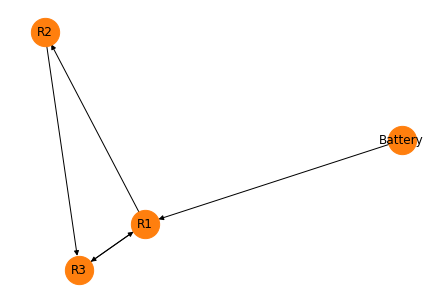

In [41]:
circuit1_Graph = nx.DiGraph()
nodes = ['R1','R2','R3','Battery']

circuit1_Graph.add_nodes_from(nodes)
circuit1_Graph.add_edges_from([('R1','R3'),('Battery','R1'), ('R1','R2'),('R2','R3'),('R3','R1')])
nx.draw_spectral(circuit1_Graph, node_color='C1', node_size=800, with_labels=True);

### Let's Solve another circuit....>>


### <span style="color:Blue">Is in this circuit Kirchhoff's laws are works ?

![currents-cycles](../1.png) 



![currents-cycles](../3.png) 


### To solve this network using Branch Currents, we’d have to establish five variables to account for each and every unique current in the circuit (I1 through I5). This would require five equations for the solution if we solve this circuit by our hand, But it is very easy for us if we will make funciton for make calculation of this circuit.

![currents-cycles](../4.png) 

#####  It's worth mentioning that even if the hypothetical position is wrong, the result will still be right, but just negative! Seeing a negative current value we will know that the direction hypothesis was wrong and that the current actually flows in the opposite direction. As we can't know in which direction the current will flow in the end, we mostly tend to make all the currents flow in the same consistent direction, which can be clockwise or counterclockwise.


#### Here is the electrical circuit representation in series of homogenous linear equations>>>

\begin{bmatrix} 
   -V_1 & {}+{} &  R_1i_1 & {}+{} & R_2(i_1 - i_2) & {}={} & 0 \\
    R_2(i_2-i_1) & {}+{} &  R_3i_2 & {}+{} &  R_4(i_2-i_3) & {}={} &  0 \\
    R_4(i_3-i_2) & {}+{} & R_5i_3 & {}+{} & V_2 & {}={} & 0
\end{bmatrix}

#### Rearrange Matrix :- 

\begin{bmatrix} 
    R_1i_1  +  R_2i_1  -  R_2i_2  =  V_1 \\
    R_2i_2  -  R_2i_1  + R_3i_2  +  R_4i_2  - R_4i_3  =  0 \\
    R_4i_3  -  R_4i_2  + R_5i_3  =  -V_2
\end{bmatrix}

#### After some transformation we can get this matrix.

\begin{bmatrix} 
    i_1(R_1 + R_2) & - & i_2R_2 & + & 0i_3 & = & V_1 \\
    -i_1R_2 & + & i_2(R_2 + R_3+ R_4) & - & i_3R_4 & = & 0 \\
    0i_1 & - & i_2R_4 & + & i3(R_4 + R_5) & = & -V_2
\end{bmatrix}


#### In order to solve this problem, we will further represent this system of linear equations as the matrix multiplication equation:

$$ AX = B $$

where
A = matrix of resistance,
B = matrix of voltage.


One way to find the unknown matrix X is to make an inverted matrix multiplication:

$$ X = A^{-1}B $$


### <span style="color:red">So, we need X , A & B in matrix form for our calculation,

 A=
\begin{bmatrix} R1+R2 & -R2 & 0 \\ -R2 & R2+R3+R4 & -R4 \\ 0 & -R4 & R4+R5 \end{bmatrix}

X=
\begin{bmatrix} i1 & \\ i2 & \\ i3& \end{bmatrix}

V=\begin{bmatrix} v1 & \\ 0 & \\ -v2& \end{bmatrix}


##   <span style="color:red"> Now we will make function to get Values of Registers, and Voltage in matrix form from user. and we will find Current of each mesh in this circuit

In [1]:
import sympy as sp

#### First of all We wil get l1-l6 values from user...(which already discribed) also We will store this all values which we took from user in one matrix. We will call it Get_Matrix().

In [2]:
def Get_Resistors_From_User():
    resistors = []    # make empty array to append all the userinput in matrix form
    
    for i in range(6):
        resistors.append(input('Enter Resistor value : R{0} : '.format(i+1)).strip())
    resistors = [float(i) for i in resistors]
    
     #Put resistance values according from our equations
    matrix = sp.Matrix([[resistors[0]+resistors[1], resistors[1]*(-1), 0],
                        [resistors[1]*(-1), resistors[1]+resistors[2]+resistors[3], resistors[3]*(-1)],
                        [0, resistors[3]*(-1), resistors[3]+resistors[4]]]) 
    return matrix


####  <span style="color:red">So, finally we complete one step of calculation....</span>
####  <span style="color:red">Now, let's make function for get voltage from user....and call it Get_Voltage_From_User

In [19]:
def Get_Voltage_From_User():
    voltage = []       # make empty array to append all the userInput1 in matrix form
    
    
    # here we take range=2 because we have no 
    for i in range(2):
        voltage.append(input('Enter Voltage Value :  V{0} :  '.format(i+1)).strip())
    voltage = [float(i) for i in voltage]
    
    # here take voltage equation values from our equations(it also described in circuit) 
    matrix = sp.Matrix([voltage[0], 0, voltage[1]*(-1)])   
    
   
    return matrix

###  <span style="color:red">Now we have two matrix - Resistors  and Voltage.  Let's go further....

In [21]:
#After that Get values of Volatages from user....
Voltage = Get_Voltage_From_User()
Voltage

Enter Voltage Value :  V1 :   12
Enter Voltage Value :  V2 :   0


Matrix([
[12.0],
[   0],
[ 0.0]])

###  <span style="color:red"> Now we have two values in matrix form. so, we can calculate current using this formula..

$$ X = A^{-1}B $$


In [27]:

#Here we have Solution calculation of matrix 

#Here we have Resistors = A and Voltage = B

Current_X = Resistors.inv() * Voltage
Current_X

Matrix([
[0.512999195926025],
[ 0.25891181988743],
[0.110962208523184]])

###  <span style="color:blue">Here we got Current for each mesh in our circuit

-

-

### Let's check our calculation is correct or not. 
### We will do earlier step one more time... 

$$ AX = B $$


#### Let's mutiply (Resistors) A *  X(Current). If we were right, we will get same value of (Voltage) B.

In [28]:
verify_Voltage = Resistors*Current_X
verify_Voltage

Matrix([
[                 12.0],
[ 1.33226762955019e-15],
[-4.44089209850063e-16]])

-

-

-

##  <span style="color:Orange">Here is the Grpah Representation of our Electrical - Circuit 

##  <span style="color:purple"> Graph-1

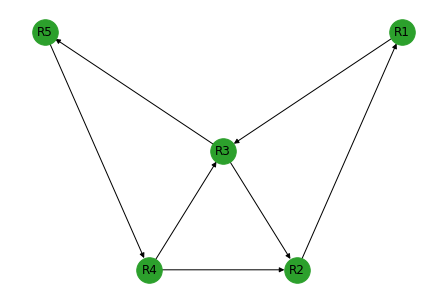

In [42]:
circuit_Graph2 = nx.DiGraph()
nodes = ['R1','R2','R3','R4','R5']

circuit_Graph2.add_nodes_from(nodes)
circuit_Graph2.add_edges_from([('R1','R3'), ('R2','R1'),('R3','R2'),('R4','R3'),('R3','R5'),('R5','R4'),('R4','R2')])
nx.draw_spectral(circuit_Graph2, node_color='C2', node_size=650, with_labels=True);

### We can represent graph of circuit like this also...

 ## <span style="color:purple">Graph-2

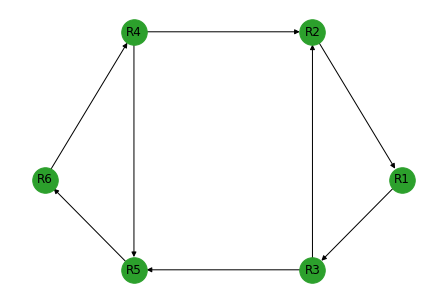

In [43]:
circuit_Graph = nx.DiGraph()
nodes = ['R1','R2','R3','R4','R5','R6']

circuit_Graph.add_nodes_from(nodes)
circuit_Graph.add_edges_from([('R2','R1'), ('R1','R3'),('R3','R2'),('R4','R5'),('R4','R2'),('R3','R5'),('R5','R6'),('R6','R4')])
nx.draw_spectral(circuit_Graph, node_color='C2', node_size=650, with_labels=True);